# chapter 2 : neural network classification

In [1]:
from sklearn.datasets import make_circles

In [2]:
sample = 1000
# create circle
X,y = make_circles(sample,noise=0.03,random_state=30)

In [3]:
X[:5],y[:5]

(array([[ 0.47975597, -0.70363449],
        [ 0.48782766, -0.65129039],
        [ 0.74450673,  0.1202565 ],
        [ 0.43280373,  0.92825379],
        [ 0.07717132, -0.8001889 ]]),
 array([1, 1, 1, 0, 1]))

In [4]:
import pandas as pd 
circle = pd.DataFrame({
    'x1':X[:,1],
    'x2':X[:,1],
    'label': y
})

In [5]:
circle

,x1,x2,label
0,-0.703634,-0.703634,1
1,-0.651290,-0.651290,1
2,0.120257,0.120257,1
3,0.928254,0.928254,0
4,-0.800189,-0.800189,1
...,...,...,...
995,0.016692,0.016692,1
996,-0.560709,-0.560709,1
997,-0.528864,-0.528864,1
998,-0.786288,-0.786288,0


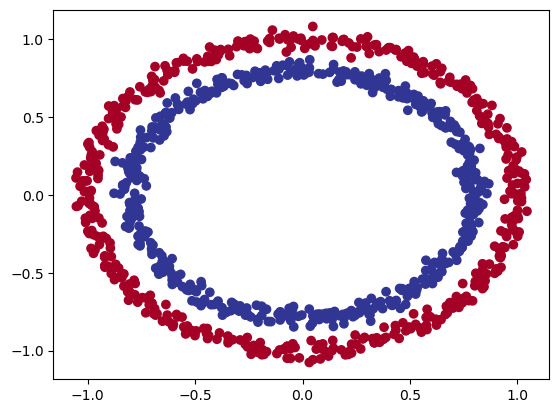

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x= X[:,0],y= X[:,1],c=y,cmap=plt.cm.RdYlBu)

### chek input and output shape

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
# viewing the sample 
X_sample = X[0]
y_sample = y[0]
X_sample.shape,y_sample.shape

((2,), ())

### changing to tensor

In [9]:
import torch
torch.__version__

'2.7.1+cu118'

In [10]:
type(X)

numpy.ndarray

In [11]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
type(X),X.dtype

(torch.Tensor, torch.float32)

### Splitting of data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [15]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

### Building a model
lets build a model to classify red dot and blue dot
1. setup device agnostic code to use GPU as accelerator
2. construction of model with the help of nn.module
3. define loss funtion and optimizer
4. creating a training and testing loop

In [16]:
# importing torch and neural network
import torch
from torch import nn

In [17]:
# creating device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [18]:
class circle_model(nn.Module):
    def __init__(self):
        super().__init__()
        # creating two layer to identify the the red and blue circle
        self.layer_1 =nn.Linear(in_features=2,out_features=10)# take two feature and upscale to gives 10 feature
        self.layer_2 =nn.Linear(in_features=10,out_features=1)# take 10 feature and give us the output
        # creation of forward pass
    def forward(self,x):
        return self.layer2(self.layer1(x)) # input -> layer1-> layer2 -> output
        

In [19]:
model0  = circle_model().to(device)
model0

circle_model(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [20]:
# lets replicate the above model using nn.sequential
model0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

In [21]:
# here is the anather alternative
class circle_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.Linear(in_features=10,out_features=1)
        )
        # creation of forward pass
    def forward(self,x):
        return self.linear_layer(x)
model0 = circle_model().to(device)

In [22]:
model0

circle_model(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [23]:
model0.state_dict()

OrderedDict([('linear_layer.0.weight',
              tensor([[ 0.3763, -0.3782],
                      [ 0.3124,  0.2139],
                      [-0.2122, -0.2615],
                      [-0.0884,  0.4676],
                      [-0.3120, -0.2936],
                      [-0.2846,  0.5759],
                      [-0.0467,  0.3052],
                      [-0.0145,  0.4839],
                      [ 0.3673,  0.5455],
                      [-0.4864, -0.0777]], device='cuda:0')),
             ('linear_layer.0.bias',
              tensor([ 0.1556,  0.5106,  0.1347,  0.5275,  0.4526, -0.2062,  0.6221, -0.0974,
                       0.1983, -0.2656], device='cuda:0')),
             ('linear_layer.1.weight',
              tensor([[-0.1040, -0.0681, -0.0044,  0.2032, -0.1983,  0.2840, -0.1956,  0.0127,
                        0.3093, -0.2573]], device='cuda:0')),
             ('linear_layer.1.bias', tensor([0.0696], device='cuda:0'))])

### making prediction without training our data

In [24]:
with torch.inference_mode():
    untrained_preds = model0(X_test.to(device))
len(untrained_preds),untrained_preds.shape

(200, torch.Size([200, 1]))

In [25]:
print (f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[ : 10])} ")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.],
        [-0.],
        [-0.],
        [ 0.],
        [-1.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [ 0.]], device='cuda:0') 

First 10 labels:
tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 0.])


### Setup loss function and optimizer
- Which loss function or optimizer should you use?
- Again ... this is problem specific.
- For example for regression you might want MAE or MSE (mean absolute error or mean squared error).
- For classification you might want binary cross entropy or categorical cross entropy (cross entropy).
- As a reminder, the loss function measures how *wrong* your models predictions are.
- And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification) 

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax() ||

In [26]:
BCEWithLogitsLoss = nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss()
)# explination purpose only (above variable)
loss_function = nn.BCEWithLogitsLoss() # it has sigmoid function in it 
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [27]:
# viewing our model logits to on the test data 
model0.eval()
with torch.inference_mode():
    y_logit = model0(X_test.to(device))
y_logit[:5]

tensor([[ 0.0873],
        [-0.0247],
        [-0.4428],
        [ 0.0436],
        [-0.5086]], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 1., 0., 1., 0.])

In [29]:
# we need them in same format (y_logiy and y_test).So we are going to use a sigmoid function to overcome this problem
y_pred_prob = torch.sigmoid(y_logit)
y_pred_prob[:5]
# this was the fuctioning of binary crossentropy loss with logit

tensor([[0.5218],
        [0.4938],
        [0.3911],
        [0.5109],
        [0.3755]], device='cuda:0')

In [30]:
# now we can pass them through round function
y_pred = torch.round(y_pred_prob)
y_pred[:5]

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

In [31]:
# whole above work in single line
y_pred_label = torch.round(torch.sigmoid(model0(X_test.to(device))))
y_pred_label[:5]

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [32]:
torch.eq(y_pred.squeeze(),y_pred_label.squeeze())

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [33]:
def accuracy_funtion(y_true,y_preds):
    correct = torch.eq(y_true,y_preds).sum().item()
    acc = (correct/len(y_preds))*100
    return acc

In [34]:
X_train


tensor([[-0.2215,  0.7917],
        [-0.6944,  0.3644],
        [ 0.9237, -0.3885],
        ...,
        [ 0.8938, -0.3302],
        [ 0.8334,  0.0302],
        [ 0.1941, -0.7877]])

### creation of training loop

### 3. Train model

To train our model, we're going to need to build a training loop with the following steps :

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

In [35]:
#putting our entire data on cuda device
model0.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [36]:
# setting up number of loop
torch.cuda.manual_seed(42)
number_of_looping = 100
for number in range(number_of_looping):
    # starting the training mode
    model0.train()
    # forward pass 
    y_logit = model0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    # calulate the accuracy 
    loss = loss_function(y_logit,y_train)
    accuracy = accuracy_funtion(y_true=y_train,y_preds=y_pred)
    # optimizer zero grad
    optimizer.zero_grad()
    # loss backward : backpropagation
    loss.backward()
    #optimizer step :adjust the values
    optimizer.step()
    # testing
    model0.eval()
    with torch.inference_mode():
        test_logit = model0(X_test)
        test_pred = torch.round(torch.sigmoid(model0(X_test)))
        # calculate the test loss and accuracy
        test_loss = loss_function(test_logit.squeeze(),y_test.squeeze())
        test_accuracy = accuracy_funtion(y_true=y_test.squeeze(),y_preds=test_pred.squeeze())
    # Print out what's happenin'
    if number % 10 == 0:
        print(f"Epoch: {number} | Loss: {loss:.5f}, Acc: {accuracy:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}")

Epoch: 0 | Loss: 0.70429, Acc: 50.25 | Test loss: 0.70914, Test acc: 48.50
Epoch: 10 | Loss: 0.70092, Acc: 50.38 | Test loss: 0.70502, Test acc: 48.50
Epoch: 20 | Loss: 0.69864, Acc: 50.50 | Test loss: 0.70217, Test acc: 48.00
Epoch: 30 | Loss: 0.69707, Acc: 50.62 | Test loss: 0.70014, Test acc: 48.00
Epoch: 40 | Loss: 0.69595, Acc: 50.50 | Test loss: 0.69869, Test acc: 47.50
Epoch: 50 | Loss: 0.69516, Acc: 50.75 | Test loss: 0.69763, Test acc: 47.00
Epoch: 60 | Loss: 0.69458, Acc: 50.62 | Test loss: 0.69685, Test acc: 47.00
Epoch: 70 | Loss: 0.69416, Acc: 50.75 | Test loss: 0.69628, Test acc: 47.50
Epoch: 80 | Loss: 0.69385, Acc: 50.75 | Test loss: 0.69586, Test acc: 47.50
Epoch: 90 | Loss: 0.69362, Acc: 50.75 | Test loss: 0.69556, Test acc: 47.50


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything ...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize! "

we will do this by plot decision boundary

In [37]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Download helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [38]:
from helper_functions import plot_predictions ,plot_decision_boundary

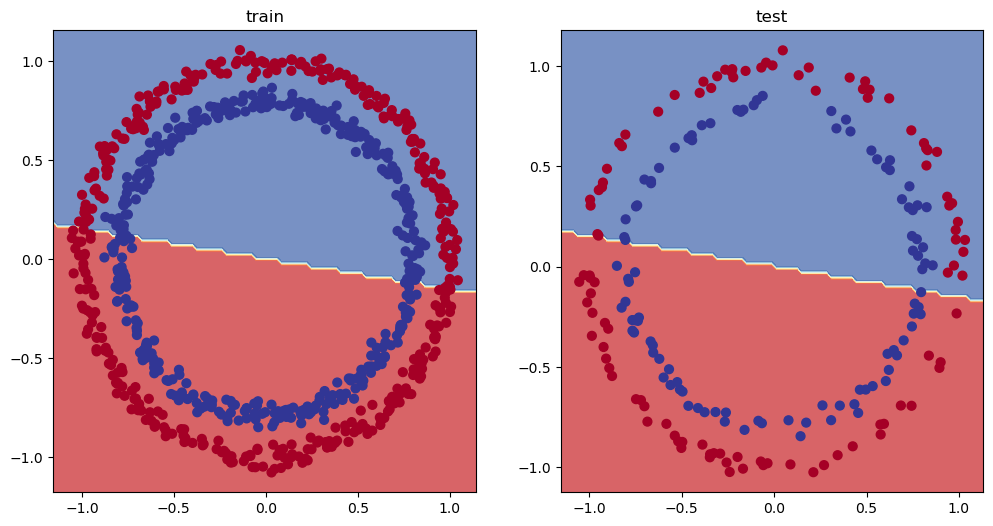

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model0,X_test,y_test)

#### graph explaination
1. What does the **background color** mean?
- The background color shows which region the model thinks belongs to which class.
- Red background area → Model predicts class 1 (red)
- Blue background area → Model predicts class 0 (blue)
2. What are the **dots**?
- Each dot is a data point
- Red dot = belongs to class 1
- Blue dot = belongs to class 0

## Method to improve our model performance
- Adding more layer : give model more chance to learn the patterns from the data
- Adding more neurons : incresing the number of neuron
- Fitting for longer : running the model through the training loop more time
- Changing the activation function
- Changing the learning rate
- Changing the loss function

### Our Model
- we will change the number of neuron in hidden layer from 10 to 20
- we will change the number of layer from 3 to 4
- we will fit the model for 1000 looping

In [40]:
model0.state_dict()

OrderedDict([('linear_layer.0.weight',
              tensor([[ 0.3859, -0.3611],
                      [ 0.3243,  0.2341],
                      [-0.2169, -0.2688],
                      [-0.1082,  0.4324],
                      [-0.2955, -0.2636],
                      [-0.3122,  0.5267],
                      [-0.0212,  0.3495],
                      [-0.0095,  0.4917],
                      [ 0.3399,  0.4960],
                      [-0.4596, -0.0302]])),
             ('linear_layer.0.bias',
              tensor([ 0.1524,  0.5065,  0.1363,  0.5342,  0.4470, -0.1967,  0.6133, -0.0992,
                       0.2077, -0.2748])),
             ('linear_layer.1.weight',
              tensor([[-0.0667, -0.1307,  0.0805,  0.1439, -0.0876,  0.1978, -0.2337, -0.0897,
                        0.1694, -0.2017]])),
             ('linear_layer.1.bias', tensor([0.1101]))])

In [41]:
class circle_model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2 , out_features=20)
        self.layer2 = nn.Linear(in_features=20,out_features=20)
        self.layer3 = nn.Linear(in_features=20,out_features=1)
    def forward(self,x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        return x3
model1 = circle_model2().to(device)
model1     

circle_model2(
  (layer1): Linear(in_features=2, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=1, bias=True)
)

In [42]:
model1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0906,  0.4055],
                      [-0.0642, -0.4396],
                      [-0.1670, -0.3635],
                      [ 0.4112, -0.2377],
                      [-0.3273,  0.4164],
                      [ 0.0105,  0.5459],
                      [-0.2539,  0.3454],
                      [ 0.0550, -0.2261],
                      [ 0.2022, -0.3856],
                      [-0.4910,  0.2659],
                      [ 0.1449, -0.4114],
                      [-0.4091,  0.5353],
                      [ 0.2533, -0.5247],
                      [-0.3190, -0.6156],
                      [-0.0211,  0.4018],
                      [-0.5383,  0.6259],
                      [-0.4032,  0.4943],
                      [ 0.2497,  0.6764],
                      [ 0.0245,  0.3352],
                      [ 0.0471, -0.2917]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.0471, -0.4670, -0.6264,  0.4075,  0.0402, -0.4786,  0.6

In [43]:
# loss function 
loss_function = nn.BCEWithLogitsLoss() # it has sigmoid function in it 
# optimizer
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)

In [44]:
#putting our entire data on cuda device
model1.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [45]:
X_train.device

device(type='cuda', index=0)

In [46]:

def looper(model0):
    # setting up number of loop
    torch.cuda.manual_seed(42)
    number_of_looping = 1000
    for number in range(number_of_looping):
        # starting the training mode
        model0.train()
        # forward pass 
        y_logit = model0(X_train).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logit))
        # calulate the accuracy 
        loss = loss_function(y_logit,y_train)
        accuracy = accuracy_funtion(y_true=y_train,y_preds=y_pred)
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward : backpropagation
        loss.backward()
        #optimizer step :adjust the values
        optimizer.step()
        # testing
        model0.eval()
        with torch.inference_mode():
            test_logit = model0(X_test)
            test_pred = torch.round(torch.sigmoid(model0(X_test)))
            # calculate the test loss and accuracy
            test_loss = loss_function(test_logit.squeeze(),y_test.squeeze())
            test_accuracy = accuracy_funtion(y_true=y_test.squeeze(),y_preds=test_pred.squeeze())
        # Print out what's happenin'
        if number % 100 == 0:
            print(f"Epoch: {number} | Loss: {loss:.5f}, Acc: {accuracy:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}")

In [47]:
looper(model1)

Epoch: 0 | Loss: 0.71542, Acc: 49.75 | Test loss: 0.70552, Test acc: 51.00
Epoch: 100 | Loss: 0.69290, Acc: 51.50 | Test loss: 0.69487, Test acc: 47.50
Epoch: 200 | Loss: 0.69289, Acc: 51.50 | Test loss: 0.69515, Test acc: 48.00
Epoch: 300 | Loss: 0.69289, Acc: 50.88 | Test loss: 0.69521, Test acc: 49.00
Epoch: 400 | Loss: 0.69289, Acc: 51.00 | Test loss: 0.69524, Test acc: 48.50
Epoch: 500 | Loss: 0.69289, Acc: 51.25 | Test loss: 0.69525, Test acc: 49.00
Epoch: 600 | Loss: 0.69289, Acc: 51.25 | Test loss: 0.69525, Test acc: 49.00
Epoch: 700 | Loss: 0.69289, Acc: 51.38 | Test loss: 0.69526, Test acc: 49.00
Epoch: 800 | Loss: 0.69289, Acc: 51.38 | Test loss: 0.69526, Test acc: 49.00
Epoch: 900 | Loss: 0.69289, Acc: 51.38 | Test loss: 0.69526, Test acc: 49.00


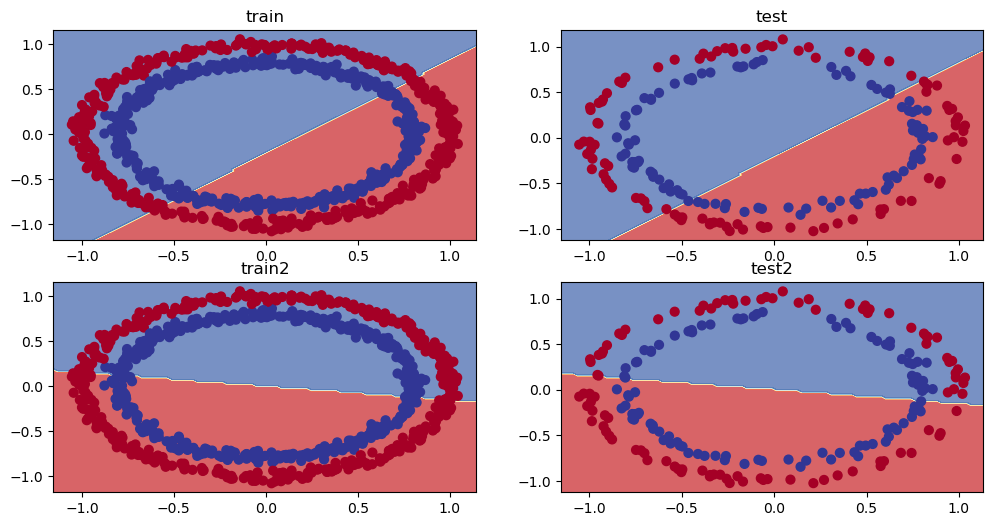

In [48]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title('train')
plot_decision_boundary(model1, X_train, y_train)

plt.subplot(2,2,2)
plt.title('test')
plot_decision_boundary(model1, X_test, y_test)

plt.subplot(2,2,3)
plt.title('train2')
plot_decision_boundary(model0, X_train, y_train)

plt.subplot(2,2,4)
plt.title('test2')
plot_decision_boundary(model0, X_test, y_test)


### testing our model1 on small data of linear regression

In [49]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression) )
X_regression[: 5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [50]:
# creating a split 
train_split = int(0.8 * len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

In [51]:
model1

circle_model2(
  (layer1): Linear(in_features=2, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=1, bias=True)
)

#### our model takes 2 input_feature but our data has only on input feature

In [52]:
# Same architecture as model_1 (but using nn.Sequential())
model2 = nn.Sequential(
nn.Linear(in_features=1, out_features=10),
nn.Linear(in_features=10, out_features=10),
nn.Linear(in_features=10, out_features=1)
).to (device)

model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [53]:
loss_function= nn.L1Loss()
optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.01)

In [54]:
#putting our entire data on cuda device
model2.to(device)
X_train_regression = X_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_train_regression = y_train_regression.to(device)
y_test_regression = y_test_regression.to(device)

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
number_of_looping=1000
for number in range(number_of_looping):
    # training
    model2.train()
    y_pred = model2(X_train_regression)
    loss = loss_function(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # testing
    model2.eval()
    with torch.inference_mode():
        test_pred = model2(X_test_regression)
        test_loss = loss_function(test_pred,y_test_regression)
    # Print out what's happenin'
    if number % 100 == 0:
        print(f"Epoch: {number} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.91934 | Test loss: 1.31575
Epoch: 100 | Loss: 0.09285 | Test loss: 0.22289
Epoch: 200 | Loss: 0.02522 | Test loss: 0.05778
Epoch: 300 | Loss: 0.01767 | Test loss: 0.06155
Epoch: 400 | Loss: 0.01794 | Test loss: 0.05976
Epoch: 500 | Loss: 0.02078 | Test loss: 0.06163
Epoch: 600 | Loss: 0.02033 | Test loss: 0.05852
Epoch: 700 | Loss: 0.02066 | Test loss: 0.05977
Epoch: 800 | Loss: 0.01964 | Test loss: 0.05780
Epoch: 900 | Loss: 0.01933 | Test loss: 0.05699


In [56]:
test_pred= test_pred.to('cpu')

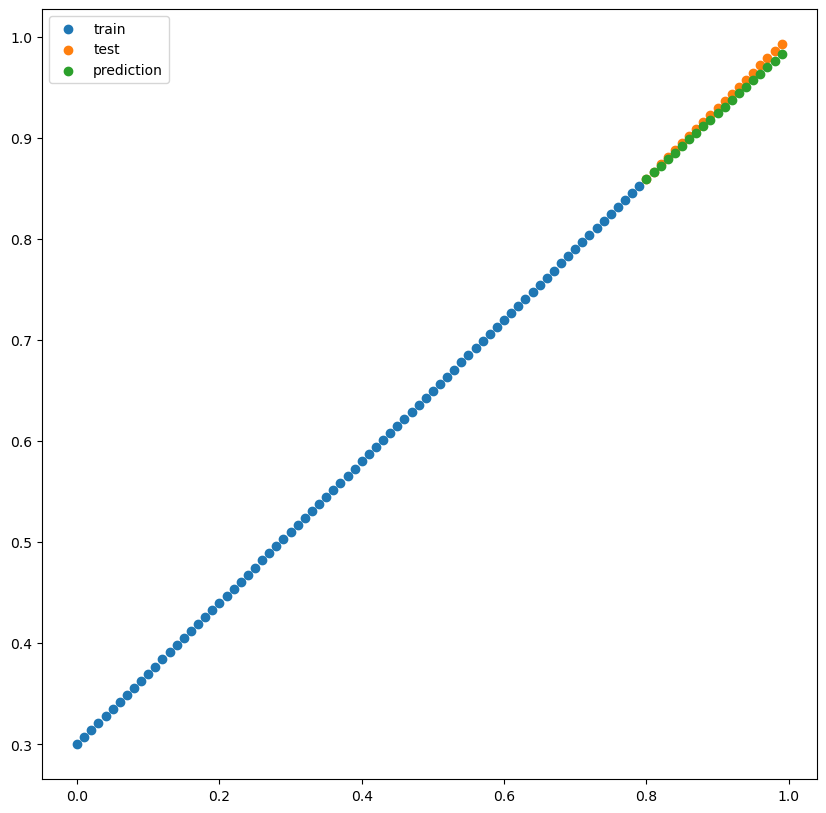

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(x=X_train_regression.cpu(),y=y_train_regression.cpu(),label='train')
plt.scatter(x=X_test_regression.cpu(),y=y_test_regression.cpu(),label = 'test')
plt.scatter(x=X_test_regression.cpu().squeeze(),y= test_pred.detach().numpy(),label = 'prediction')
plt.legend()

In [58]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [59]:
class circle_model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=10)
        self.layer2 = nn.Linear(out_features=10,in_features=10)
        self.layer3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()# it is non linear activation fuction
    def forward(self,x):
        # this is how we are going to use ReLU
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [60]:
model3 = circle_model3().to(device)

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [61]:
# setup loss function and optimizer
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model3.parameters(),
                            lr=0.1)

In [62]:
#putting our entire data on cuda device
model3.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [63]:
model3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, 

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

number_of_looping = 1000 
for number in range(number_of_looping):
    ### Training
    model3.train()
    
    # 1. Forward pass (keep logits shape [N] by squeezing once and consistently)
    y_logits = model3(X_train).squeeze(-1)        # squeeze only last dim
    y_pred_probs = torch.sigmoid(y_logits)
    y_pred = (y_pred_probs > 0.5).long()          # predictions as integer labels

    # 2. Calculate the loss (BCEWithLogitsLoss expects logits and target floats)
    # Make sure y_train has shape [N] or [N,1] consistently and dtype float
    loss = loss_function(y_logits, y_train.float())

    # accuracy - ensure y_train dtype and shape match y_pred
    acc = accuracy_funtion(y_true=y_train.long(), y_preds=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model3.eval()
    with torch.inference_mode():
        test_logits = model3(X_test).squeeze(-1)       # same squeeze logic
        test_probs = torch.sigmoid(test_logits)
        test_pred = (test_probs > 0.5).long()

    test_loss = loss_function(test_logits, y_test.float())
    test_acc = accuracy_funtion(y_true=y_test.long(), y_preds=test_pred)

    if number % 100 == 0:
        print(f"Epoch: {number} | Loss: {loss :.4f}, Acc: {acc :.2f} | Test Loss: {test_loss :.4f}, Test Acc: {test_acc :.2f}")


Epoch: 0 | Loss: 0.6929, Acc: 50.25 | Test Loss: 0.6935, Test Acc: 49.00
Epoch: 100 | Loss: 0.6907, Acc: 64.75 | Test Loss: 0.6919, Test Acc: 61.50
Epoch: 200 | Loss: 0.6888, Acc: 60.00 | Test Loss: 0.6910, Test Acc: 57.50
Epoch: 300 | Loss: 0.6859, Acc: 60.00 | Test Loss: 0.6896, Test Acc: 58.00
Epoch: 400 | Loss: 0.6814, Acc: 60.00 | Test Loss: 0.6874, Test Acc: 57.00
Epoch: 500 | Loss: 0.6744, Acc: 64.75 | Test Loss: 0.6842, Test Acc: 59.50
Epoch: 600 | Loss: 0.6652, Acc: 66.50 | Test Loss: 0.6784, Test Acc: 61.50
Epoch: 700 | Loss: 0.6518, Acc: 69.50 | Test Loss: 0.6675, Test Acc: 64.00
Epoch: 800 | Loss: 0.6296, Acc: 73.25 | Test Loss: 0.6461, Test Acc: 66.00
Epoch: 900 | Loss: 0.5867, Acc: 78.38 | Test Loss: 0.6035, Test Acc: 78.00


In [65]:
model3.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model3(X_test))).squeeze()
y_pred[:10],y_test[:10]

(tensor([0., 0., 1., 1., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 0.], device='cuda:0'))

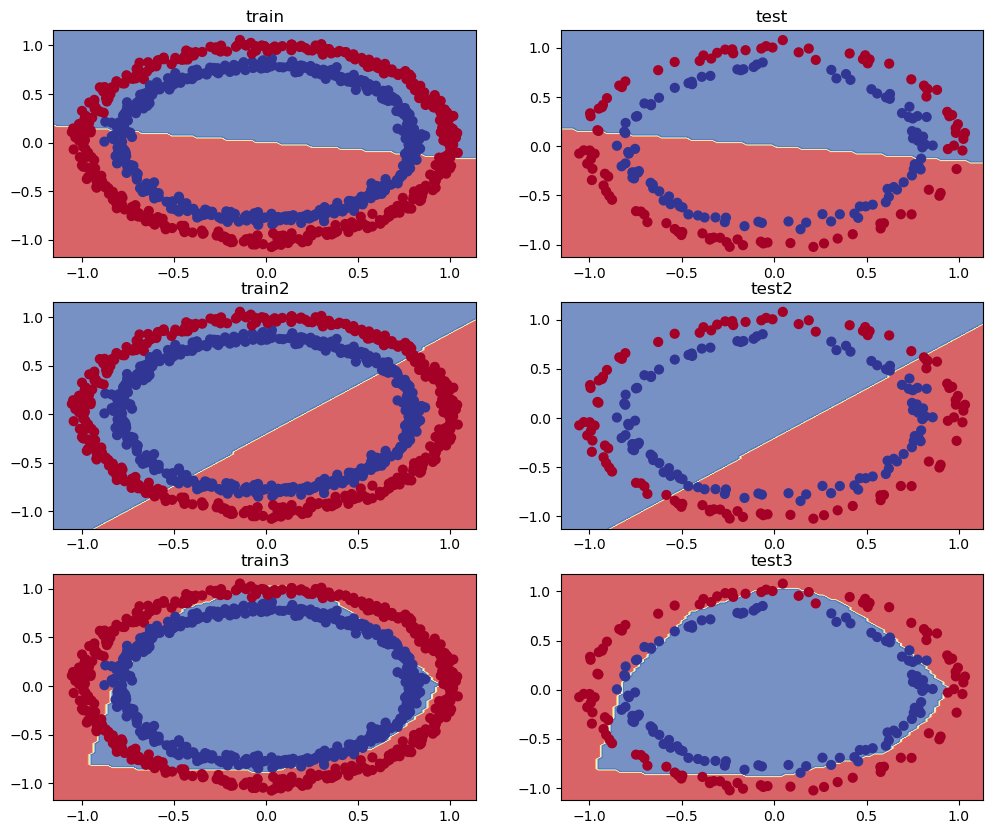

In [66]:
plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
plt.title('train')
plot_decision_boundary(model0, X_train, y_train)# no non linearity

plt.subplot(3,2,2)
plt.title('test')
plot_decision_boundary(model0, X_test, y_test)# no non linearity

plt.subplot(3,2,3)
plt.title('train2')
plot_decision_boundary(model1, X_train, y_train)# no non linearity

plt.subplot(3,2,4)
plt.title('test2')
plot_decision_boundary(model1, X_test, y_test)# no non linearity

plt.subplot(3,2,5)
plt.title('train3')
plot_decision_boundary(model3, X_train, y_train)# has non linearity

plt.subplot(3,2,6)
plt.title('test3')
plot_decision_boundary(model3, X_test, y_test)# has non linearity


## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn,
we give it the tools to discover patterns in data and it tries to
figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [67]:
A = torch.arange(-20,20,1,dtype = torch.float32)


In [68]:
A

tensor([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
         -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,
          4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.])

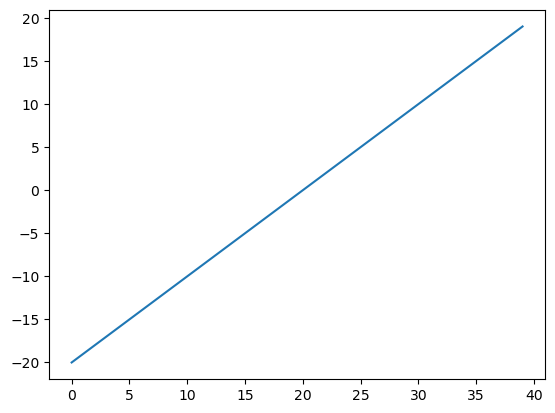

In [69]:
plt.plot(A) # x-axis is index and y axis is the value of the tensor

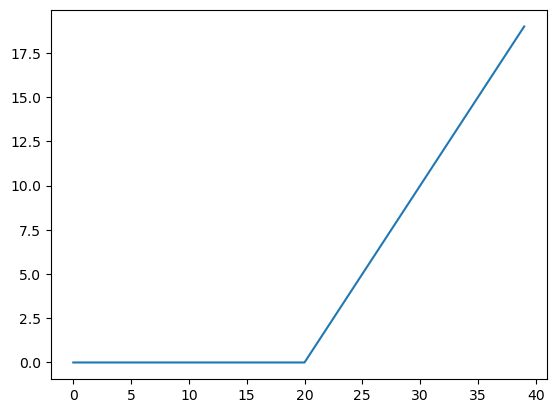

In [70]:
plt.plot(A.relu())

In [71]:
A[21]

tensor(1.)

In [72]:
A.relu()

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
         8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [73]:
# lets explain the functioning of ReLU fuction
def relu(x: torch.tensor)-> torch.tensor:
    return torch.maximum(torch.tensor(0),x)# see the documentation of maximum to understand the line 

In [74]:
relu(A)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
         8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

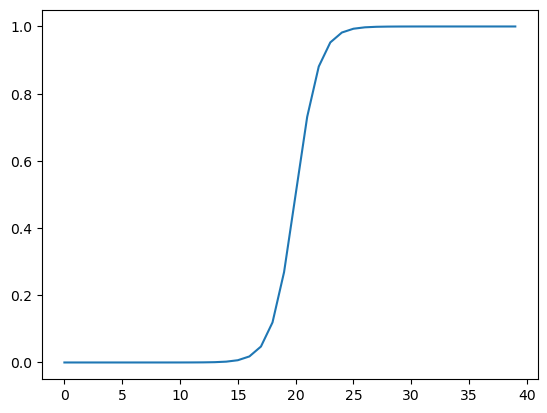

In [75]:
plt.plot(torch.sigmoid(A))

In [76]:
torch.sigmoid(A)

tensor([2.0612e-09, 5.6028e-09, 1.5230e-08, 4.1399e-08, 1.1254e-07, 3.0590e-07,
        8.3153e-07, 2.2603e-06, 6.1442e-06, 1.6701e-05, 4.5398e-05, 1.2339e-04,
        3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03, 1.7986e-02, 4.7426e-02,
        1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01, 8.8080e-01, 9.5257e-01,
        9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01, 9.9966e-01, 9.9988e-01,
        9.9995e-01, 9.9998e-01, 9.9999e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

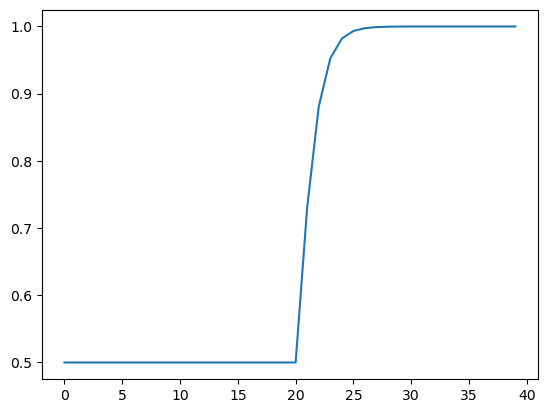

In [77]:
plt.plot(torch.sigmoid(torch.relu(A)))

In [78]:
torch.sigmoid(torch.relu(A))

tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.7311, 0.8808, 0.9526, 0.9820, 0.9933, 0.9975,
        0.9991, 0.9997, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])

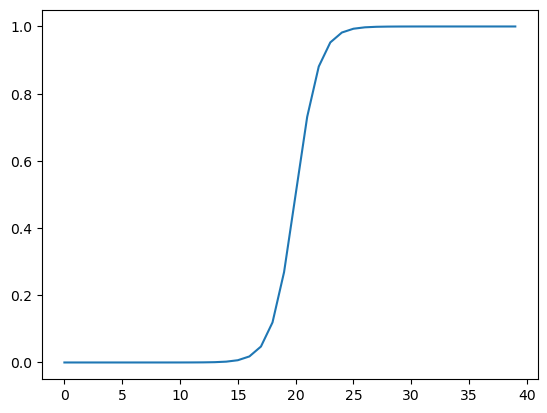

In [79]:
plt.plot(torch.relu(torch.sigmoid(A)))

In [80]:
torch.relu(torch.sigmoid(A))

tensor([2.0612e-09, 5.6028e-09, 1.5230e-08, 4.1399e-08, 1.1254e-07, 3.0590e-07,
        8.3153e-07, 2.2603e-06, 6.1442e-06, 1.6701e-05, 4.5398e-05, 1.2339e-04,
        3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03, 1.7986e-02, 4.7426e-02,
        1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01, 8.8080e-01, 9.5257e-01,
        9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01, 9.9966e-01, 9.9988e-01,
        9.9995e-01, 9.9998e-01, 9.9999e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

### now we are going to use multiclass classification

creating our toy dataset

In [81]:
from sklearn.datasets import make_blobs # see documentation to see params

In [82]:
X_blobs,y_blobs = make_blobs(n_samples=1000,
                             n_features=2, # demention of the cordinates
                             centers=6, #number of classes
                             cluster_std = 1.5, # create some noise
                             random_state=42)

In [83]:
# conversion to tensor from numpy
X_blobs = torch.from_numpy(X_blobs).type(torch.float)
y_blobs= torch.from_numpy(y_blobs).type(torch.LongTensor)

In [84]:
X_train_blobs,X_test_blobs,y_train_blobs,y_test_blobs = train_test_split(X_blobs,
                                                                         y_blobs,
                                                                         random_state=42,
                                                                         test_size=0.20)

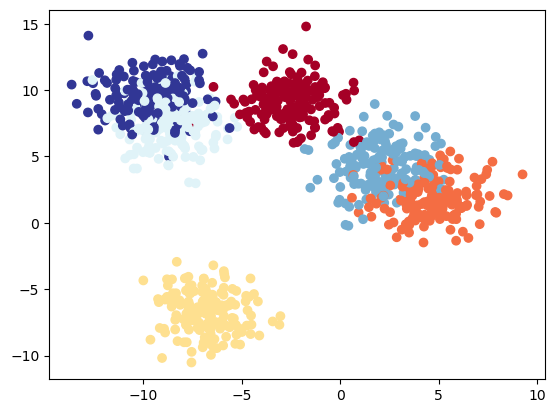

In [85]:
plt.scatter(X_blobs[:,0],X_blobs[:,1],c = y_blobs,cmap=plt.cm.RdYlBu)

In [86]:
class blobmodel(nn.Module):
    def __init__(self,input_feature,output_feature,hidden_unit=10):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feature,out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features= hidden_unit,out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features= hidden_unit,out_features=output_feature)
        )
    def forward(self,x):
        return self.linear_layer_stack(x)

In [87]:
model4 = blobmodel(input_feature=2,
                   output_feature=6,
                   hidden_unit=10)

In [88]:
model4

blobmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=6, bias=True)
  )
)

In [89]:
# getting a loss function
loss_function= nn.CrossEntropyLoss()
# getting a optimizer
optimizer = torch.optim.SGD(params=model4.parameters(),
                            lr = 0.1)

In [90]:
model4.to(device)
X_train_blobs = X_train_blobs.to(device)
X_test_blobs = X_test_blobs.to(device)
y_train_blobs = y_train_blobs.to(device)
y_test_blobs = y_test_blobs.to(device)


In [91]:
model4.eval() 
with torch.inference_mode():
    y_logit = model4(X_test_blobs.to(device))
y_logit[:10]# this is giving us raw logits

tensor([[-0.2272, -0.0720,  0.7972, -0.0683,  0.2136, -0.3348],
        [-0.2241, -0.0669,  0.8126, -0.0736,  0.2205, -0.3383],
        [-0.3150, -0.1270,  0.3645,  0.0742,  0.0445, -0.2292],
        [-0.5601, -0.1379,  0.3849,  0.0391,  0.2064, -0.2942],
        [-0.5592,  0.2340,  0.5782, -0.2403,  0.4835, -0.3551],
        [-0.2247,  0.0905,  0.8187, -0.0814,  0.3406, -0.3413],
        [-0.6802, -0.0555,  0.4712, -0.0492,  0.3419, -0.3430],
        [-0.3374, -0.2003,  1.0968, -0.2423,  0.4601, -0.3507],
        [-0.3243, -0.1348,  0.3581,  0.0721,  0.0437, -0.2236],
        [-0.3447, -0.1816,  0.9460, -0.2024,  0.3643, -0.3328]],
       device='cuda:0')

In [92]:
y_test_blobs[:10]

tensor([1, 1, 2, 3, 0, 4, 5, 1, 2, 1], device='cuda:0')

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits(created by model) -> Pred probs(use soft max) -> Pred labels(use argmax)

In [93]:
# converting the model logits to prediction probability using solftmax
y_pred_prob = torch.softmax(y_logit,dim = 1)
y_logit[:5],y_pred_prob[:5]

(tensor([[-0.2272, -0.0720,  0.7972, -0.0683,  0.2136, -0.3348],
         [-0.2241, -0.0669,  0.8126, -0.0736,  0.2205, -0.3383],
         [-0.3150, -0.1270,  0.3645,  0.0742,  0.0445, -0.2292],
         [-0.5601, -0.1379,  0.3849,  0.0391,  0.2064, -0.2942],
         [-0.5592,  0.2340,  0.5782, -0.2403,  0.4835, -0.3551]],
        device='cuda:0'),
 tensor([[0.1166, 0.1362, 0.3247, 0.1367, 0.1812, 0.1047],
         [0.1162, 0.1360, 0.3277, 0.1351, 0.1813, 0.1037],
         [0.1223, 0.1476, 0.2413, 0.1805, 0.1752, 0.1332],
         [0.0964, 0.1470, 0.2480, 0.1755, 0.2074, 0.1257],
         [0.0850, 0.1878, 0.2650, 0.1169, 0.2411, 0.1042]], device='cuda:0'))

In [94]:
y_logit.shape

torch.Size([200, 6])

In [95]:
y_pred_prob.shape

torch.Size([200, 6])

In [96]:
y_pred = torch.argmax(y_pred_prob,dim=1)# we can see argmax documentation
y_pred

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')

In [97]:
y_test_blobs

tensor([1, 1, 2, 3, 0, 4, 5, 1, 2, 1, 0, 3, 1, 3, 2, 4, 5, 0, 4, 2, 1, 5, 4, 1,
        0, 4, 5, 1, 2, 3, 3, 3, 4, 4, 3, 1, 1, 5, 1, 0, 4, 0, 5, 1, 5, 0, 5, 2,
        3, 2, 1, 3, 5, 4, 2, 1, 5, 5, 3, 0, 5, 0, 4, 1, 2, 5, 2, 1, 3, 5, 2, 4,
        3, 3, 4, 0, 3, 0, 3, 0, 2, 3, 5, 3, 2, 0, 2, 0, 0, 2, 2, 2, 0, 3, 4, 4,
        3, 0, 5, 2, 5, 4, 0, 4, 0, 0, 0, 4, 0, 3, 2, 3, 1, 4, 0, 5, 5, 3, 1, 1,
        3, 1, 5, 2, 0, 5, 5, 3, 4, 5, 3, 5, 4, 1, 3, 0, 3, 3, 1, 1, 4, 3, 2, 3,
        3, 1, 5, 3, 1, 1, 3, 3, 0, 5, 2, 4, 3, 3, 1, 0, 0, 4, 3, 5, 5, 0, 0, 2,
        5, 3, 1, 5, 0, 0, 3, 5, 5, 0, 5, 5, 1, 4, 2, 3, 3, 5, 0, 3, 1, 3, 3, 3,
        2, 1, 5, 1, 0, 5, 5, 2], device='cuda:0')

In [98]:
model4.to(device)
X_train_blobs = X_train_blobs.to(device)
X_test_blobs = X_test_blobs.to(device)
y_train_blobs = y_train_blobs.to(device)
y_test_blobs = y_test_blobs.to(device)


In [99]:
# creating a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
number_of_looping=100
for number in range(number_of_looping):
    # training
    model4.train()
    y_logit = model4(X_train_blobs)
    y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)
    loss = loss_function(y_logit,y_train_blobs)
    acc = accuracy_funtion(y_preds=y_pred,y_true=y_train_blobs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model4.eval()
    with torch.inference_mode():
        test_logit = model4(X_test_blobs)
        test_pred = torch.softmax(test_logit,dim=1).argmax(dim=1)
        test_loss= loss_function(test_logit,y_test_blobs)
        test_acc = accuracy_funtion(y_preds=test_pred,y_true=y_test_blobs)
    # Print out what's happenin'
    if number % 10 == 0:
        print(f"Epoch: {number} | Loss: {loss :.4f}, Acc: {acc :.2f}% | Test loss: {test_loss :.4f}, Test acc: {test_acc :.2f}%")

Epoch: 0 | Loss: 1.9177, Acc: 17.62% | Test loss: 1.8472, Test acc: 13.00%
Epoch: 10 | Loss: 1.5721, Acc: 33.88% | Test loss: 1.5884, Test acc: 28.00%
Epoch: 20 | Loss: 1.3032, Acc: 56.38% | Test loss: 1.3339, Test acc: 50.00%
Epoch: 30 | Loss: 1.1104, Acc: 73.38% | Test loss: 1.1367, Test acc: 71.50%
Epoch: 40 | Loss: 0.8282, Acc: 79.50% | Test loss: 0.8140, Test acc: 84.50%
Epoch: 50 | Loss: 0.6397, Acc: 81.62% | Test loss: 0.6423, Test acc: 76.50%
Epoch: 60 | Loss: 0.4995, Acc: 81.12% | Test loss: 0.5313, Test acc: 76.50%
Epoch: 70 | Loss: 0.4318, Acc: 82.50% | Test loss: 0.4814, Test acc: 77.50%
Epoch: 80 | Loss: 0.4061, Acc: 83.62% | Test loss: 0.4606, Test acc: 78.50%
Epoch: 90 | Loss: 0.3926, Acc: 84.75% | Test loss: 0.4489, Test acc: 83.00%


In [100]:
# Make predictions
model4.eval()
with torch.inference_mode():
    y_logits = model4(X_test_blobs)

# View the first 10 predictions
y_logits[ : 10]

tensor([[-1.0613,  7.0838,  0.5638, -5.1695,  5.8322, -4.6305],
        [-1.0384,  7.2774,  0.5453, -5.3393,  6.0203, -4.7632],
        [-1.9590,  0.6167,  5.8739, -1.5428,  0.2548, -1.8238],
        [ 0.6981, -3.0387,  0.0357,  5.0417, -0.7831,  4.9542],
        [ 9.9813, -4.4581, -7.0626,  1.0475,  6.5027,  3.7613],
        [ 4.4464,  3.5040, -3.3208, -3.9300,  8.0960, -1.9803],
        [ 2.0674, -5.4246, -2.1882,  8.7420, -1.2585,  8.8476],
        [-3.2570, 11.7439,  1.6849, -7.1897,  7.8025, -6.6661],
        [-1.5021,  0.3202,  4.2497, -0.9660,  0.1224, -1.2840],
        [-2.5883,  9.6198,  1.3693, -6.0168,  6.5887, -5.5960]],
       device='cuda:0')

In [101]:
y_pred_prob = torch.softmax(y_logits,dim=1)
y_pred_prob

tensor([[2.2530e-04, 7.7651e-01, 1.1443e-03, 3.7033e-06, 2.2211e-01, 6.3488e-06],
        [1.9023e-04, 7.7764e-01, 9.2694e-04, 2.5787e-06, 2.2123e-01, 4.5880e-06],
        [3.9245e-04, 5.1567e-03, 9.8982e-01, 5.9499e-04, 3.5910e-03, 4.4925e-04],
        ...,
        [1.5439e-03, 2.3546e-06, 3.6192e-05, 4.9251e-01, 8.8977e-05, 5.0581e-01],
        [8.2057e-04, 4.8307e-07, 9.2604e-06, 4.7485e-01, 3.0409e-05, 5.2429e-01],
        [5.2402e-04, 5.5822e-03, 9.8806e-01, 9.3124e-04, 4.1949e-03, 7.0753e-04]],
       device='cuda:0')

In [102]:
y_pred = torch.argmax(y_pred_prob,dim=1)
y_pred

tensor([1, 1, 2, 3, 0, 4, 5, 1, 2, 1, 0, 3, 1, 3, 2, 4, 5, 0, 1, 2, 1, 5, 0, 1,
        0, 4, 5, 1, 2, 5, 3, 3, 1, 4, 5, 1, 4, 3, 1, 0, 4, 0, 5, 1, 5, 0, 5, 2,
        5, 2, 1, 3, 3, 4, 2, 1, 5, 3, 3, 0, 5, 0, 1, 1, 2, 5, 2, 1, 5, 5, 2, 4,
        5, 5, 4, 0, 3, 0, 3, 0, 2, 5, 5, 5, 2, 0, 2, 0, 0, 2, 2, 2, 0, 5, 4, 1,
        5, 0, 5, 2, 5, 4, 0, 4, 0, 0, 0, 4, 0, 3, 2, 3, 1, 4, 0, 5, 5, 5, 1, 4,
        3, 1, 5, 2, 0, 5, 5, 5, 4, 5, 3, 5, 4, 1, 3, 0, 5, 5, 4, 1, 1, 5, 2, 3,
        3, 1, 5, 5, 1, 1, 3, 3, 0, 5, 2, 4, 3, 3, 1, 0, 0, 4, 3, 5, 5, 0, 0, 2,
        3, 5, 4, 5, 0, 0, 3, 5, 5, 0, 5, 5, 1, 4, 2, 3, 5, 3, 0, 3, 1, 3, 5, 3,
        2, 1, 5, 1, 0, 5, 5, 2], device='cuda:0')

In [103]:
y_test_blobs

tensor([1, 1, 2, 3, 0, 4, 5, 1, 2, 1, 0, 3, 1, 3, 2, 4, 5, 0, 4, 2, 1, 5, 4, 1,
        0, 4, 5, 1, 2, 3, 3, 3, 4, 4, 3, 1, 1, 5, 1, 0, 4, 0, 5, 1, 5, 0, 5, 2,
        3, 2, 1, 3, 5, 4, 2, 1, 5, 5, 3, 0, 5, 0, 4, 1, 2, 5, 2, 1, 3, 5, 2, 4,
        3, 3, 4, 0, 3, 0, 3, 0, 2, 3, 5, 3, 2, 0, 2, 0, 0, 2, 2, 2, 0, 3, 4, 4,
        3, 0, 5, 2, 5, 4, 0, 4, 0, 0, 0, 4, 0, 3, 2, 3, 1, 4, 0, 5, 5, 3, 1, 1,
        3, 1, 5, 2, 0, 5, 5, 3, 4, 5, 3, 5, 4, 1, 3, 0, 3, 3, 1, 1, 4, 3, 2, 3,
        3, 1, 5, 3, 1, 1, 3, 3, 0, 5, 2, 4, 3, 3, 1, 0, 0, 4, 3, 5, 5, 0, 0, 2,
        5, 3, 1, 5, 0, 0, 3, 5, 5, 0, 5, 5, 1, 4, 2, 3, 3, 5, 0, 3, 1, 3, 3, 3,
        2, 1, 5, 1, 0, 5, 5, 2], device='cuda:0')

In [104]:
test_accuracy = accuracy_funtion(y_preds=y_pred,y_true=y_test_blobs)
test_accuracy

83.0

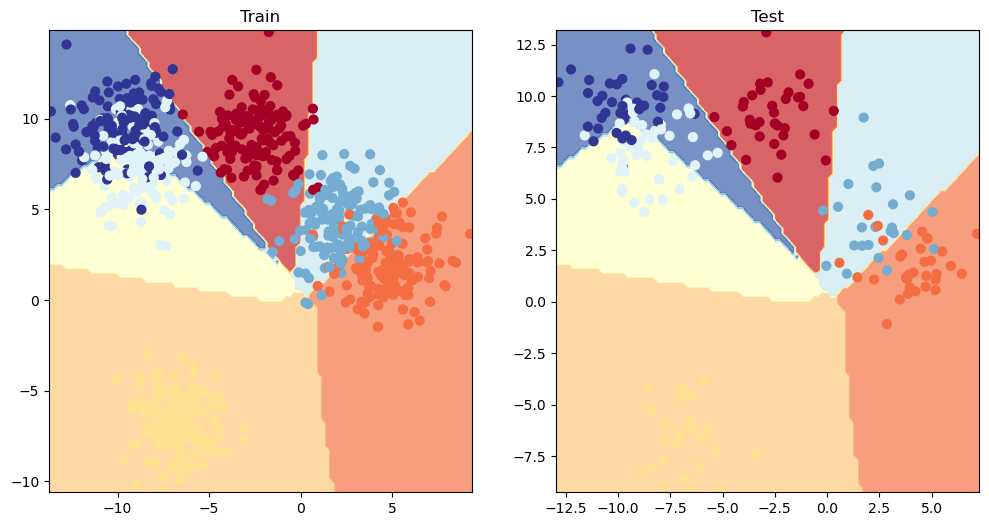

In [105]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model4, X_train_blobs, y_train_blobs)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model4, X_test_blobs, y_test_blobs)

### classification matrix

accuracy

In [109]:
!pip install torchmetrics 

  Using cached torchmetrics-1.8.2-py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/983.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/983.2 kB ? eta -:--:--
   -------------------- ----------------- 524.3/983.2 kB 176.5 kB/s eta 0:00:03
   -------------------------------------- 983.2/983.2 kB 417.7 kB/s eta 0:00:00

   -------------------- ------------------- 1/2 [torchmetrics]
   -------------------- ------------------- 1/2 [torchm

In [110]:
from torchmetrics import Accuracy

In [117]:
metrics_accuracy = Accuracy(task="multiclass", num_classes=len(set(y_test_blobs))).to(device)  # Adjust num_classes based on your data
metrics_accuracy(y_pred,y_test_blobs)

tensor(0.8300, device='cuda:0')

#### we can use the other like this only